<a href="https://colab.research.google.com/github/Charith-25/RL-Project/blob/main/RL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class GarbageTruck:
    def __init__(self, speed, capacity, routing_preferences):
        self.speed = speed
        self.capacity = capacity
        self.routing_preferences = routing_preferences
        self.position = (0, 0)
        self.collected_garbage = 0

    def move(self, action):
        # Define the possible movements based on the truck's speed
        movements = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }

        # Calculate the new position based on the chosen action and truck's speed
        movement = movements[action]
        new_position = (
            self.position[0] + self.speed * movement[0],
            self.position[1] + self.speed * movement[1]
        )

        self.position = new_position

    def collect_garbage(self, garbage):
        collected = min(garbage, self.capacity - self.collected_garbage)
        self.collected_garbage += collected
        return collected


# Create multiple garbage trucks with different characteristics
truck1 = GarbageTruck(speed=1, capacity=10, routing_preferences=['up', 'left'])
truck2 = GarbageTruck(speed=2, capacity=15, routing_preferences=['right', 'down'])
truck3 = GarbageTruck(speed=1, capacity=20, routing_preferences=['left', 'down'])

# Define the grid environment
grid_size = (10, 10)
grid = np.zeros(grid_size)

# Move and collect garbage with the trucks
truck1.move('up')
truck2.move('right')
truck3.move('left')
collected = truck1.collect_garbage(5)

print(f"Truck 1 Position: {truck1.position}")
print(f"Truck 2 Position: {truck2.position}")
print(f"Truck 3 Position: {truck3.position}")
print(f"Truck 1 Collected: {collected} units of garbage")


Truck 1 Position: (-1, 0)
Truck 2 Position: (0, 2)
Truck 3 Position: (0, -1)
Truck 1 Collected: 5 units of garbage


In [ ]:
import random

class GarbageBin:
    def __init__(self, location, capacity):
        self.location = location
        self.capacity = capacity
        self.current_garbage = 0

    def add_garbage(self, amount):
        self.current_garbage = min(self.current_garbage + amount, self.capacity)

    def remove_garbage(self, amount):
        removed = min(amount, self.current_garbage)
        self.current_garbage -= removed
        return removed


# Define the grid environment size
grid_size = (10, 10)

# Define the number of garbage bins and their properties
num_bins = 5
max_capacity = 20

# Create garbage bins with random locations and capacities
garbage_bins = []
for _ in range(num_bins):
    location = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
    capacity = random.randint(1, max_capacity)
    garbage_bin = GarbageBin(location, capacity)
    garbage_bins.append(garbage_bin)

# Update garbage bins with garbage amounts
for garbage_bin in garbage_bins:
    garbage_amount = random.randint(0, garbage_bin.capacity)
    garbage_bin.add_garbage(garbage_amount)

# Print the properties of the garbage bins
for i, garbage_bin in enumerate(garbage_bins):
    print(f"Garbage Bin {i+1}:")
    print(f"Location: {garbage_bin.location}")
    print(f"Capacity: {garbage_bin.capacity}")
    print(f"Current Garbage: {garbage_bin.current_garbage}")
    print()


Garbage Bin 1:
Location: (1, 8)
Capacity: 12
Current Garbage: 10

Garbage Bin 2:
Location: (1, 0)
Capacity: 4
Current Garbage: 3

Garbage Bin 3:
Location: (4, 5)
Capacity: 19
Current Garbage: 17

Garbage Bin 4:
Location: (8, 5)
Capacity: 6
Current Garbage: 3

Garbage Bin 5:
Location: (4, 8)
Capacity: 1
Current Garbage: 0



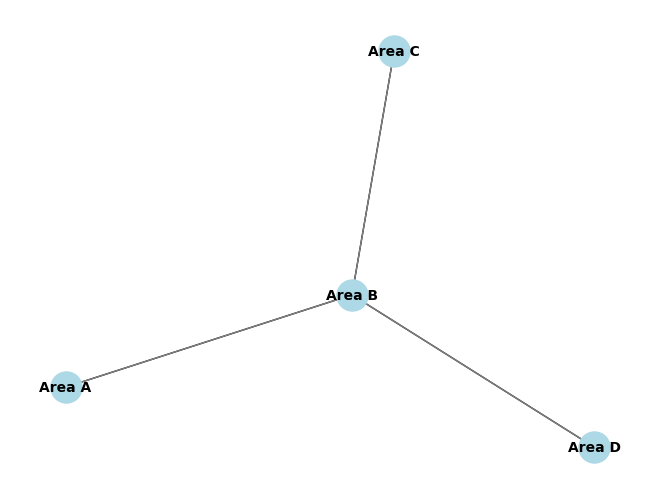

In [ ]:
import networkx as nx
import random

# Create a graph to represent the road network
road_network = nx.Graph()

# Define areas in the environment
areas = ['Area A', 'Area B', 'Area C', 'Area D']

# Add areas as nodes in the road network
road_network.add_nodes_from(areas)

# Define the road connections between areas
road_connections = [
    ('Area A', 'Area B'),
    ('Area A', 'Area C'),
    ('Area B', 'Area C'),
    ('Area B', 'Area D')
]

# Add road connections as edges in the road network
road_network.add_edges_from(road_connections)

# Add additional road closures or obstacles
road_network.remove_edge('Area A', 'Area C')

# Define garbage truck routes
garbage_truck_routes = {
    'Truck 1': ['Area A', 'Area B', 'Area C'],
    'Truck 2': ['Area C', 'Area B', 'Area D']
}

# Simulate garbage truck routing considering road closures or obstacles
for truck, route in garbage_truck_routes.items():
    # Check for road closures or obstacles in the route
    for i in range(len(route) - 1):
        if not road_network.has_edge(route[i], route[i+1]):
            print(f"Road closure detected on route of {truck}: {route[i]} to {route[i+1]}")

# Visualize the road network
pos = nx.spring_layout(road_network)
nx.draw(road_network, pos, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold', font_size=10)
nx.draw_networkx_edges(road_network, pos, edge_color='gray')



In [ ]:
import random
import time

class GarbageGenerator:
    def __init__(self, locations):
        self.locations = locations

    def generate_garbage(self):
        garbage = []
        for location in self.locations:
            amount = random.randint(0, 10)  # Generate a random amount of garbage
            garbage.append((location, amount))
        return garbage


# Define the locations where garbage can be generated
garbage_locations = ['Area A', 'Area B', 'Area C', 'Area D']

# Create a garbage generator with specified locations
garbage_generator = GarbageGenerator(garbage_locations)

# Simulate garbage generation over time
for _ in range(5):
    garbage = garbage_generator.generate_garbage()
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    print(f"Garbage generated at {timestamp}:")
    for location, amount in garbage:
        print(f"{amount} units of garbage at {location}")
    print()
    time.sleep(2)  # Pause for demonstration purposes



Garbage generated at 2023-06-17 19:00:17:
6 units of garbage at Area A
10 units of garbage at Area B
3 units of garbage at Area C
7 units of garbage at Area D

Garbage generated at 2023-06-17 19:00:19:
7 units of garbage at Area A
4 units of garbage at Area B
4 units of garbage at Area C
7 units of garbage at Area D

Garbage generated at 2023-06-17 19:00:21:
0 units of garbage at Area A
10 units of garbage at Area B
4 units of garbage at Area C
8 units of garbage at Area D

Garbage generated at 2023-06-17 19:00:23:
0 units of garbage at Area A
10 units of garbage at Area B
2 units of garbage at Area C
7 units of garbage at Area D

Garbage generated at 2023-06-17 19:00:25:
8 units of garbage at Area A
7 units of garbage at Area B
8 units of garbage at Area C
6 units of garbage at Area D



In [ ]:
import random

class GarbageTruck:
    def __init__(self, truck_id, sensing_range):
        self.truck_id = truck_id
        self.sensing_range = sensing_range
        self.position = (0, 0)

    def sense_garbage_bins(self, garbage_bins):
        nearby_bins = []
        for bin in garbage_bins:
            distance = self.calculate_distance(self.position, bin.location)
            if distance <= self.sensing_range:
                nearby_bins.append(bin)
        return nearby_bins

    def sense_other_trucks(self, other_trucks):
        nearby_trucks = []
        for truck in other_trucks:
            if truck.truck_id != self.truck_id:
                distance = self.calculate_distance(self.position, truck.position)
                if distance <= self.sensing_range:
                    nearby_trucks.append(truck)
        return nearby_trucks

    def sense_road_conditions(self, road_conditions):
        if self.position in road_conditions:
            current_road_condition = road_conditions[self.position]
        else:
            current_road_condition = 'Clear'
        return current_road_condition

    def calculate_distance(self, pos1, pos2):
        x1, y1 = pos1
        x2, y2 = pos2
        return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5


# Define garbage bins
class GarbageBin:
    def __init__(self, location):
        self.location = location

# Create garbage trucks with sensing capabilities
truck1 = GarbageTruck(truck_id='Truck 1', sensing_range=3)
truck2 = GarbageTruck(truck_id='Truck 2', sensing_range=2)

# Define garbage bins in the environment
garbage_bins = []
for _ in range(5):
    location = (random.randint(0, 10), random.randint(0, 10))
    garbage_bin = GarbageBin(location)
    garbage_bins.append(garbage_bin)

# Define road conditions in the environment
road_conditions = {
    (0, 0): 'Clear',
    (1, 2): 'Heavy Traffic',
    (3, 4): 'Road Closure',
    (5, 6): 'Clear',
    (7, 8): 'Obstacle'
}

# Simulate garbage trucks sensing their environment
truck1.position = (2, 3)
nearby_bins = truck1.sense_garbage_bins(garbage_bins)
nearby_trucks = truck1.sense_other_trucks([truck2])
road_condition = truck1.sense_road_conditions(road_conditions)

print(f"Truck 1 nearby bins:")
for bin in nearby_bins:
    print(f"Location: {bin.location}")
print()

print(f"Truck 1 nearby trucks:")
for truck in nearby_trucks:
    print(f"Truck ID: {truck.truck_id}")
print()

print(f"Truck 1 current road condition: {road_condition}")


Truck 1 nearby bins:

Truck 1 nearby trucks:

Truck 1 current road condition: Clear


In [ ]:
import random

# Define the GarbageTruck class
class GarbageTruck:
    def __init__(self, truck_id):
        self.truck_id = truck_id
        self.position = (0, 0)

    def choose_action(self, state):
        # TODO: Implement the action selection logic based on the current state
        # You can use a trained RL model or define a set of rules for action selection

        # Placeholder random action selection for demonstration purposes
        actions = ["Move Up", "Move Down", "Move Left", "Move Right"]
        return random.choice(actions)

    def update_position(self, action):
        # TODO: Implement the logic to update the truck's position based on the chosen action
        # Update the position attribute based on the action taken

        # Placeholder logic to randomly update the position for demonstration purposes
        x, y = self.position
        if action == "Move Up":
            self.position = (x, y + 1)
        elif action == "Move Down":
            self.position = (x, y - 1)
        elif action == "Move Left":
            self.position = (x - 1, y)
        elif action == "Move Right":
            self.position = (x + 1, y)

# Define the main simulation loop
def simulate_garbage_trucks(num_trucks, num_steps):
    trucks = [GarbageTruck(f"Truck {i+1}") for i in range(num_trucks)]

    for step in range(num_steps):
        print(f"Step {step + 1}:")
        for truck in trucks:
            # TODO: Get the current state of the environment
            state = None  # Placeholder for the current state

            # Choose an action based on the current state
            action = truck.choose_action(state)

            # Update the truck's position based on the chosen action
            truck.update_position(action)

            # TODO: Update the environment based on the truck's action and new position

            print(f"{truck.truck_id}: {truck.position}")
        print()

# Run the simulation
num_trucks = 2
num_steps = 5
simulate_garbage_trucks(num_trucks, num_steps)


Step 1:
Truck 1: (0, 1)
Truck 2: (1, 0)

Step 2:
Truck 1: (0, 0)
Truck 2: (2, 0)

Step 3:
Truck 1: (1, 0)
Truck 2: (2, -1)

Step 4:
Truck 1: (1, 1)
Truck 2: (1, -1)

Step 5:
Truck 1: (0, 1)
Truck 2: (0, -1)



In [ ]:
import random

class GarbageTruck:
    def __init__(self, truck_id):
        self.truck_id = truck_id
        self.position = (0, 0)
        self.total_distance_traveled = 0
        self.total_garbage_collected = 0

    def choose_action(self, state):
        # Action selection logic

        # Placeholder random action selection for demonstration purposes
        actions = ["Move Up", "Move Down", "Move Left", "Move Right"]
        return random.choice(actions)

    def update_position(self, action):
        # Update position based on the chosen action

        # Placeholder logic to randomly update the position for demonstration purposes
        x, y = self.position
        if action == "Move Up":
            self.position = (x, y + 1)
        elif action == "Move Down":
            self.position = (x, y - 1)
        elif action == "Move Left":
            self.position = (x - 1, y)
        elif action == "Move Right":
            self.position = (x + 1, y)

        self.total_distance_traveled += 1

    def collect_garbage(self, garbage_bin):
        # Increment the total garbage collected by the truck
        self.total_garbage_collected += garbage_bin.capacity
        garbage_bin.empty()


class GarbageBin:
    def __init__(self, location, capacity):
        self.location = location
        self.capacity = capacity

    def empty(self):
        self.capacity = 0


# Define the main simulation loop
def simulate_garbage_trucks(num_trucks, num_steps):
    trucks = [GarbageTruck(f"Truck {i+1}") for i in range(num_trucks)]
    garbage_bins = [GarbageBin((random.randint(0, 10), random.randint(0, 10)), random.randint(1, 5)) for _ in range(5)]

    for step in range(num_steps):
        print(f"Step {step + 1}:")
        for truck in trucks:
            # Get the current state of the environment
            state = None  # Placeholder for the current state

            # Choose an action based on the current state
            action = truck.choose_action(state)

            # Update the truck's position based on the chosen action
            truck.update_position(action)

            # Check if the truck is at a garbage bin location
            for garbage_bin in garbage_bins:
                if truck.position == garbage_bin.location:
                    truck.collect_garbage(garbage_bin)

            print(f"{truck.truck_id}: {truck.position}")
        print()

    # Calculate and print performance metrics
    print("Performance Metrics:")
    for truck in trucks:
        print(f"{truck.truck_id}")
        print(f"Distance Traveled: {truck.total_distance_traveled}")
        print(f"Garbage Collected: {truck.total_garbage_collected}")
        print()


# Run the simulation
num_trucks = 2
num_steps = 5
simulate_garbage_trucks(num_trucks, num_steps)


Step 1:
Truck 1: (-1, 0)
Truck 2: (0, -1)

Step 2:
Truck 1: (-2, 0)
Truck 2: (-1, -1)

Step 3:
Truck 1: (-1, 0)
Truck 2: (-2, -1)

Step 4:
Truck 1: (-1, 1)
Truck 2: (-3, -1)

Step 5:
Truck 1: (0, 1)
Truck 2: (-3, 0)

Performance Metrics:
Truck 1
Distance Traveled: 5
Garbage Collected: 0

Truck 2
Distance Traveled: 5
Garbage Collected: 0



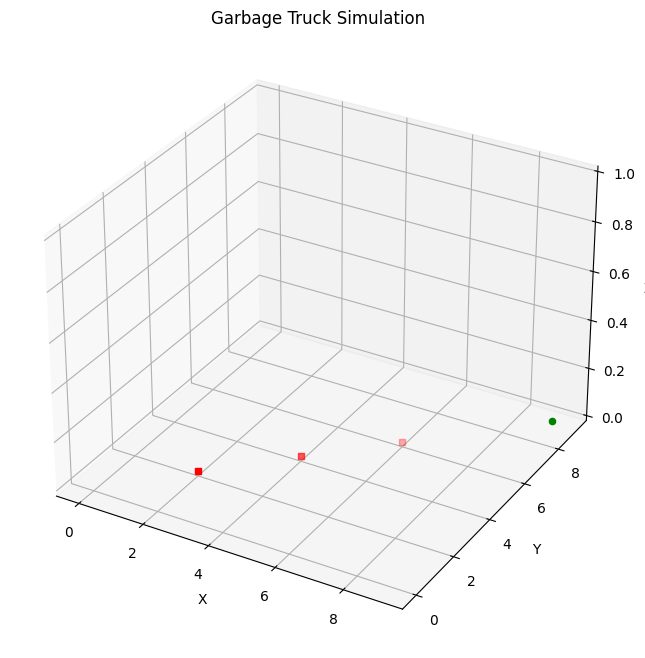

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation


class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))
        self.target = (size - 1, size - 1)
        self.truck_pos = [(0, 0), (0, 0), (0, 0)]  # Initialize truck positions
        self.obstacles = [(2, 2), (4, 4), (6, 6)]  # Define obstacle positions

        # Add obstacles to the grid
        for obstacle in self.obstacles:
            self.grid[obstacle[0], obstacle[1]] = 1


# Create an instance of the Environment class
env = Environment(size=10)

# Define routes for the garbage trucks' movements
route_1 = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
route_2 = [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
route_3 = [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7)]

# Create a figure and axes for visualization
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-0.5, env.size - 0.5)
ax.set_ylim3d(-0.5, env.size - 0.5)
ax.set_zlim3d(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Garbage Truck Simulation')

# Scatter plot for obstacles and target
obstacles = np.where(env.grid == 1)
ax.scatter(obstacles[0], obstacles[1], np.zeros_like(obstacles[0]), color='red', marker='s')
ax.scatter([env.target[0]], [env.target[1]], [0], color='green', marker='o')

# Line plots for the routes of three garbage trucks
route_line_1, = ax.plot([], [], [], color='blue', linestyle='-', linewidth=2)
route_line_2, = ax.plot([], [], [], color='orange', linestyle='-', linewidth=2)
route_line_3, = ax.plot([], [], [], color='green', linestyle='-', linewidth=2)

# Function to update the visualization
def update(frame):
    env.truck_pos[0] = route_1[frame]
    env.truck_pos[1] = route_2[frame]
    env.truck_pos[2] = route_3[frame]

    route_line_1.set_data([pos[0] for pos in route_1[:frame+1]], [pos[1] for pos in route_1[:frame+1]])
    route_line_1.set_3d_properties([0] * (frame + 1))

    route_line_2.set_data([pos[0] for pos in route_2[:frame+1]], [pos[1] for pos in route_2[:frame+1]])
    route_line_2.set_3d_properties([0] * (frame + 1))

    route_line_3.set_data([pos[0] for pos in route_3[:frame+1]], [pos[1] for pos in route_3[:frame+1]])
    route_line_3.set_3d_properties([0] * (frame + 1))

    return route_line_1, route_line_2, route_line_3

# Set the number of frames for animation
num_frames = len(route_1)

# Animate the movement
anim = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True, repeat=False)

# Display the animation
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))  # Create an empty grid

        # Add obstacles to the grid
        self.grid[2, 2] = 1
        self.grid[4, 4] = 1

        # Set the target location
        self.target = (7, 7)

        # Set the initial position of the truck
        self.truck_pos = (0, 0)


In [9]:
class Environment:
    # ...

    def move_up(self):
        new_pos = (self.truck_pos[0] - 1, self.truck_pos[1])
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_down(self):
        new_pos = (self.truck_pos[0] + 1, self.truck_pos[1])
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_left(self):
        new_pos = (self.truck_pos[0], self.truck_pos[1] - 1)
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_right(self):
        new_pos = (self.truck_pos[0], self.truck_pos[1] + 1)
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def is_valid_move(self, pos):
        x, y = pos
        if 0 <= x < self.size and 0 <= y < self.size and self.grid[x, y] != 1:
            return True
        return False


In [10]:
class Environment:
    # ...

    def plot_environment(self):
        plt.figure(figsize=(6, 6))

        # Plot the grid
        plt.imshow(self.grid, cmap='binary', origin='upper', extent=[0, self.size, 0, self.size])

        # Plot obstacles
        obstacles = np.where(self.grid == 1)
        plt.scatter(obstacles[1], obstacles[0], color='red', marker='s')

        # Plot target

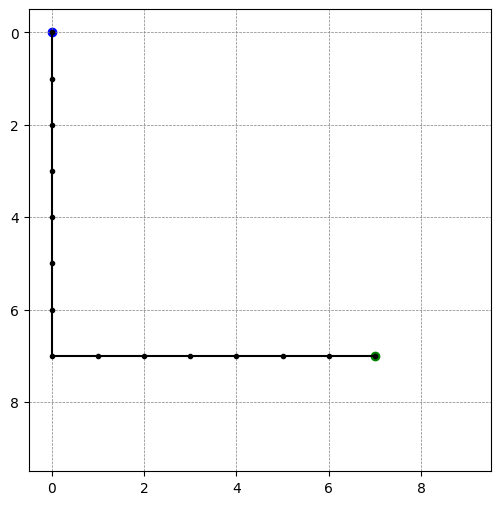

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))  # Create an empty grid
        self.target = (7, 7)  # Set the target location
        self.truck_pos = (0, 0)  # Set the initial position of the truck

    def move_up(self):
        new_pos = (self.truck_pos[0] - 1, self.truck_pos[1])
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_down(self):
        new_pos = (self.truck_pos[0] + 1, self.truck_pos[1])
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_left(self):
        new_pos = (self.truck_pos[0], self.truck_pos[1] - 1)
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_right(self):
        new_pos = (self.truck_pos[0], self.truck_pos[1] + 1)
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def is_valid_move(self, pos):
        x, y = pos
        if 0 <= x < self.size and 0 <= y < self.size and self.grid[x, y] != 1:
            return True
        return False

    def plot_environment(self, path=None):
        plt.figure(figsize=(6, 6))
        plt.imshow(self.grid, cmap='binary', origin='upper', extent=[0, self.size, 0, self.size])
        obstacles = np.where(self.grid == 1)
        plt.scatter(obstacles[1], obstacles[0], color='red', marker='s')
        plt.scatter(*self.target, color='green', marker='o')
        plt.scatter(*self.truck_pos, color='blue', marker='o')

        if path is not None:
            path = np.array(path)
            plt.plot(path[:, 1], path[:, 0], 'k.-')

        plt.xlim(-0.5, self.size - 0.5)
        plt.ylim(-0.5, self.size - 0.5)
        plt.gca().invert_yaxis()
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.show()

# Create an instance of the Environment class
env = Environment(size=10)

# Define a path for the truck's movement
path = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]

# Plot the environment and the truck's path
env.plot_environment(path)


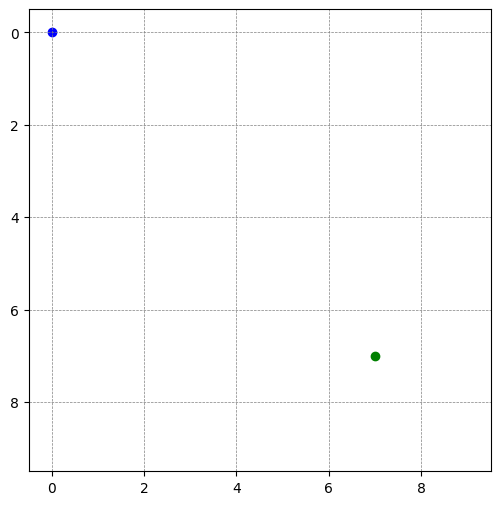

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))  # Create an empty grid
        self.target = (7, 7)  # Set the target location
        self.truck_pos = (0, 0)  # Set the initial position of the truck

    def move_up(self):
        new_pos = (self.truck_pos[0] - 1, self.truck_pos[1])
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_down(self):
        new_pos = (self.truck_pos[0] + 1, self.truck_pos[1])
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_left(self):
        new_pos = (self.truck_pos[0], self.truck_pos[1] - 1)
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_right(self):
        new_pos = (self.truck_pos[0], self.truck_pos[1] + 1)
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def is_valid_move(self, pos):
        x, y = pos
        if 0 <= x < self.size and 0 <= y < self.size and self.grid[x, y] != 1:
            return True
        return False

    def animate_movement(self, path):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(self.grid, cmap='binary', origin='upper', extent=[0, self.size, 0, self.size])
        obstacles = np.where(self.grid == 1)
        ax.scatter(obstacles[1], obstacles[0], color='red', marker='s')
        target_dot = ax.scatter(*self.target, color='green', marker='o')
        truck_dot = ax.scatter(*self.truck_pos, color='blue', marker='o')

        def update(frame):
            self.truck_pos = path[frame]
            truck_dot.set_offsets(self.truck_pos)

        anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
        plt.xlim(-0.5, self.size - 0.5)
        plt.ylim(-0.5, self.size - 0.5)
        plt.gca().invert_yaxis()
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.show()

# Create an instance of the Environment class
env = Environment(size=10)

# Define a path for the truck's movement
path = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]

# Animate the truck's movement
animation = env.animate_movement(path)
plt.show()


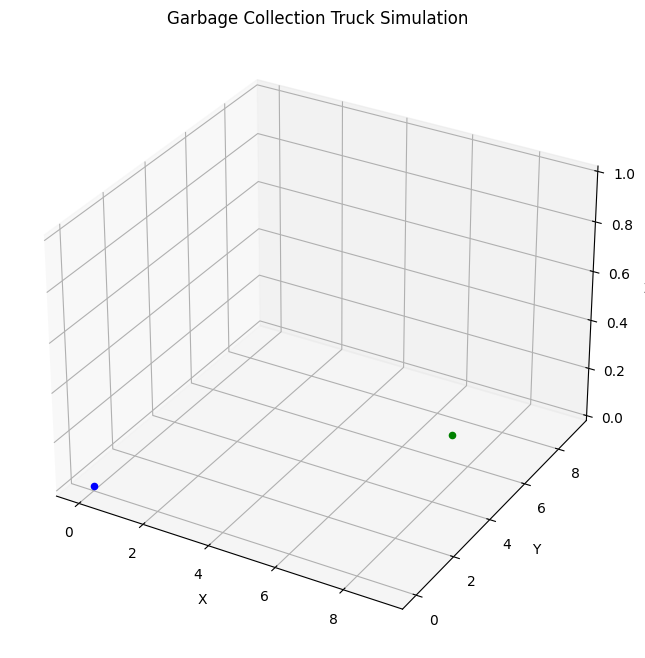

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))  # Create an empty grid
        self.target = (7, 7)  # Set the target location
        self.truck_pos = (0, 0)  # Set the initial position of the truck

    def move_up(self):
        new_pos = (self.truck_pos[0] - 1, self.truck_pos[1])
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_down(self):
        new_pos = (self.truck_pos[0] + 1, self.truck_pos[1])
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_left(self):
        new_pos = (self.truck_pos[0], self.truck_pos[1] - 1)
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def move_right(self):
        new_pos = (self.truck_pos[0], self.truck_pos[1] + 1)
        if self.is_valid_move(new_pos):
            self.truck_pos = new_pos

    def is_valid_move(self, pos):
        x, y = pos
        if 0 <= x < self.size and 0 <= y < self.size and self.grid[x, y] != 1:
            return True
        return False

    def simulate_movement(self, path):
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlim3d(-0.5, self.size - 0.5)
        ax.set_ylim3d(-0.5, self.size - 0.5)
        ax.set_zlim3d(0, 1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Garbage Collection Truck Simulation')

        obstacles = np.where(self.grid == 1)
        ax.scatter(obstacles[0], obstacles[1], np.zeros_like(obstacles[0]), color='red', marker='s')
        ax.scatter([self.target[0]], [self.target[1]], [0], color='green', marker='o')
        truck_dot = ax.scatter([self.truck_pos[0]], [self.truck_pos[1]], [0], color='blue', marker='o')

        def update(frame):
            self.truck_pos = path[frame]
            truck_dot._offsets3d = ([self.truck_pos[0]], [self.truck_pos[1]], [0])

        anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
        plt.show()

# Create an instance of the Environment class
env = Environment(size=10)

# Define a path for the truck's movement
path = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]

# Simulate the movement in the environment
env.simulate_movement(path)

Animation saved as garbage_truck_animation.mp4


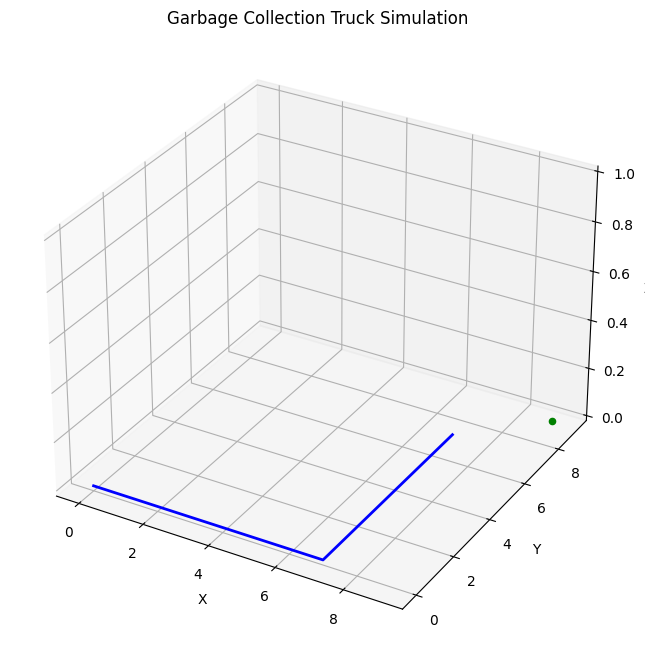

In [24]:
# Create an instance of the Environment class
env = Environment(size=10)

# Define a path for the truck's movement
path = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]

# Create a figure and axes for visualization
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-0.5, env.size - 0.5)
ax.set_ylim3d(-0.5, env.size - 0.5)
ax.set_zlim3d(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Garbage Collection Truck Simulation')

# Scatter plot for obstacles and target
obstacles = np.where(env.grid == 1)
ax.scatter(obstacles[0], obstacles[1], np.zeros_like(obstacles[0]), color='red', marker='s')
ax.scatter([env.target[0]], [env.target[1]], [0], color='green', marker='o')

# Line plot for the path
path_line, = ax.plot([], [], [], color='blue', linestyle='-', linewidth=2)

# Function to update the visualization
def update(frame):
    env.truck_pos = path[frame]
    path_line.set_data([pos[0] for pos in path[:frame+1]], [pos[1] for pos in path[:frame+1]])
    path_line.set_3d_properties([0] * (frame + 1))
    return path_line,

# Set the number of frames for animation
num_frames = len(path)

# Animate the movement
anim = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True, repeat=False)

# Save the animation as a video file
anim.save('garbage_truck_animation.mp4')

# Display a message once the animation is saved
print("Animation saved as garbage_truck_animation.mp4")


In [25]:
!pip install matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


Animation saved as garbage_truck_animation.mp4


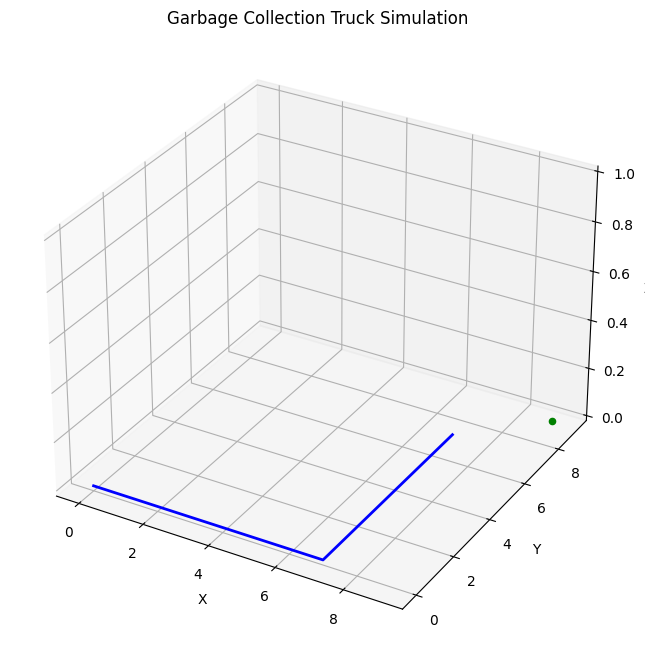

In [27]:
# Create an instance of the Environment class
env = Environment(size=10)

# Define a path for the truck's movement
path = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]

# Create a figure and axes for visualization
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-0.5, env.size - 0.5)
ax.set_ylim3d(-0.5, env.size - 0.5)
ax.set_zlim3d(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Garbage Collection Truck Simulation')

# Scatter plot for obstacles and target
obstacles = np.where(env.grid == 1)
ax.scatter(obstacles[0], obstacles[1], np.zeros_like(obstacles[0]), color='red', marker='s')
ax.scatter([env.target[0]], [env.target[1]], [0], color='green', marker='o')

# Line plot for the path
path_line, = ax.plot([], [], [], color='blue', linestyle='-', linewidth=2)

# Function to update the visualization
def update(frame):
    env.truck_pos = path[frame]
    path_line.set_data([pos[0] for pos in path[:frame+1]], [pos[1] for pos in path[:frame+1]])
    path_line.set_3d_properties([0] * (frame + 1))
    return path_line,

# Set the number of frames for animation
num_frames = len(path)

# Animate the movement
anim = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True, repeat=False)

# Save the animation as a video file
anim.save('garbage_truck_animation.mp4')

# Display a message once the animation is saved
print("Animation saved as garbage_truck_animation.mp4")

In [28]:
import os

# Get the current directory
current_dir = os.getcwd()

# List all files in the current directory
files = os.listdir(current_dir)

# Find the MP4 file
mp4_files = [file for file in files if file.endswith('.mp4')]

# Display the file path
if mp4_files:
    mp4_file = mp4_files[0]
    mp4_path = os.path.join(current_dir, mp4_file)
    print("MP4 file path:", mp4_path)
else:
    print("MP4 file not found in the current directory.")


MP4 file path: /content/garbage_truck_animation.mp4


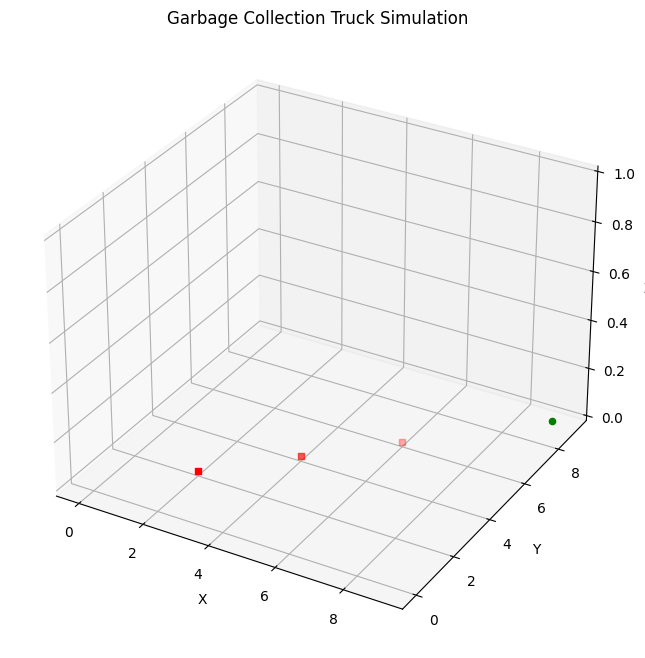

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation


class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))
        self.target = (size - 1, size - 1)
        self.truck_pos = (0, 0)
        self.obstacles = [(2, 2), (4, 4), (6, 6)]  # Define obstacle positions

        # Add obstacles to the grid
        for obstacle in self.obstacles:
            self.grid[obstacle[0], obstacle[1]] = 1


# Create an instance of the Environment class
env = Environment(size=10)

# Define a path for the truck's movement
path = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]

# Create a figure and axes for visualization
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-0.5, env.size - 0.5)
ax.set_ylim3d(-0.5, env.size - 0.5)
ax.set_zlim3d(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Garbage Collection Truck Simulation')

# Scatter plot for obstacles and target
obstacles = np.where(env.grid == 1)
ax.scatter(obstacles[0], obstacles[1], np.zeros_like(obstacles[0]), color='red', marker='s')
ax.scatter([env.target[0]], [env.target[1]], [0], color='green', marker='o')

# Line plot for the path
path_line, = ax.plot([], [], [], color='blue', linestyle='-', linewidth=2)

# Function to update the visualization
def update(frame):
    env.truck_pos = path[frame]
    path_line.set_data([pos[0] for pos in path[:frame+1]], [pos[1] for pos in path[:frame+1]])
    path_line.set_3d_properties([0] * (frame + 1))
    return path_line,

# Set the number of frames for animation
num_frames = len(path)

# Animate the movement
anim = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True, repeat=False)

# Display the animation
plt.show()


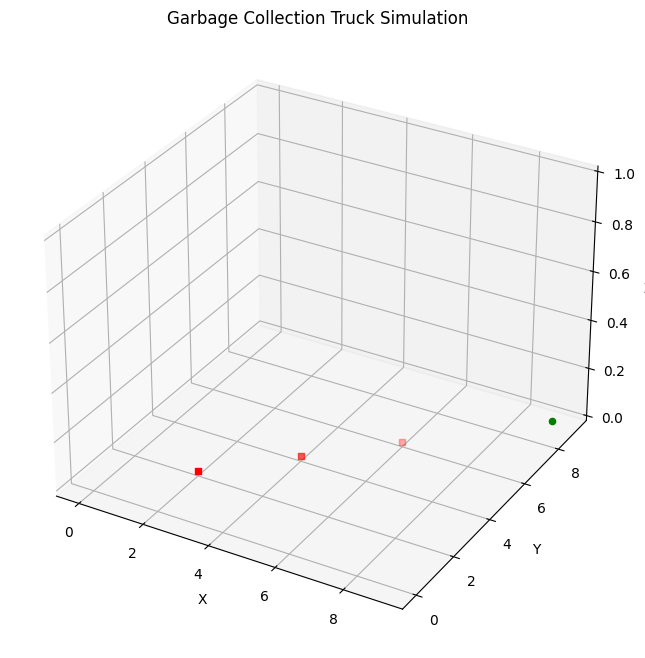

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation


class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))
        self.target = (size - 1, size - 1)
        self.truck_pos = [(0, 0), (0, 0), (0, 0)]  # Initialize truck positions
        self.obstacles = [(2, 2), (4, 4), (6, 6)]  # Define obstacle positions

        # Add obstacles to the grid
        for obstacle in self.obstacles:
            self.grid[obstacle[0], obstacle[1]] = 1


# Create an instance of the Environment class
env = Environment(size=10)

# Define paths for the trucks' movements
path_1 = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
path_2 = [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
path_3 = [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7)]

# Create a figure and axes for visualization
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-0.5, env.size - 0.5)
ax.set_ylim3d(-0.5, env.size - 0.5)
ax.set_zlim3d(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Garbage Collection Truck Simulation')

# Scatter plot for obstacles and target
obstacles = np.where(env.grid == 1)
ax.scatter(obstacles[0], obstacles[1], np.zeros_like(obstacles[0]), color='red', marker='s')
ax.scatter([env.target[0]], [env.target[1]], [0], color='green', marker='o')

# Line plots for the paths of three trucks
path_line_1, = ax.plot([], [], [], color='blue', linestyle='-', linewidth=2)
path_line_2, = ax.plot([], [], [], color='orange', linestyle='-', linewidth=2)
path_line_3, = ax.plot([], [], [], color='green', linestyle='-', linewidth=2)

# Function to update the visualization
def update(frame):
    env.truck_pos[0] = path_1[frame]
    env.truck_pos[1] = path_2[frame]
    env.truck_pos[2] = path_3[frame]

    path_line_1.set_data([pos[0] for pos in path_1[:frame+1]], [pos[1] for pos in path_1[:frame+1]])
    path_line_1.set_3d_properties([0] * (frame + 1))

    path_line_2.set_data([pos[0] for pos in path_2[:frame+1]], [pos[1] for pos in path_2[:frame+1]])
    path_line_2.set_3d_properties([0] * (frame + 1))

    path_line_3.set_data([pos[0] for pos in path_3[:frame+1]], [pos[1] for pos in path_3[:frame+1]])
    path_line_3.set_3d_properties([0] * (frame + 1))

    return path_line_1, path_line_2, path_line_3

# Set the number of frames for animation
num_frames = len(path_1)

# Animate the movement
anim = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True, repeat=False)

# Display the animation
plt.show()


Animation saved as garbage_truck_animation.mp4


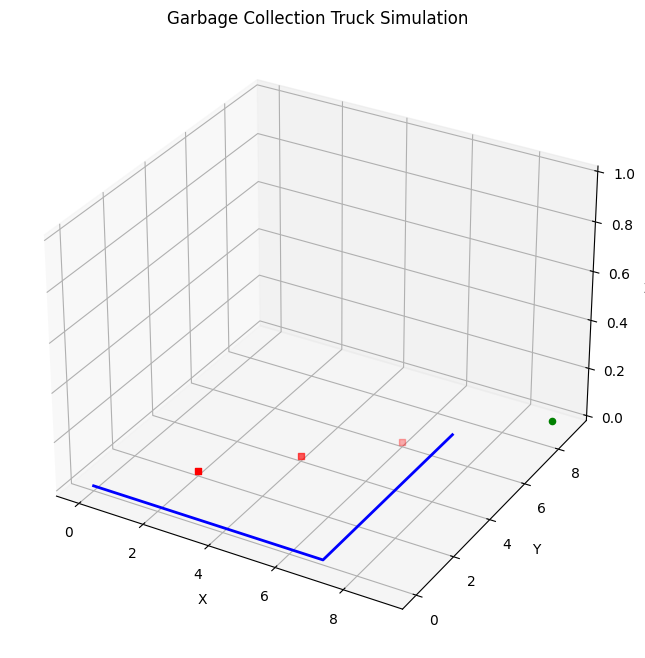

In [33]:
# Create an instance of the Environment class
env = Environment(size=10)

# Define a path for the truck's movement
path = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]

# Create a figure and axes for visualization
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-0.5, env.size - 0.5)
ax.set_ylim3d(-0.5, env.size - 0.5)
ax.set_zlim3d(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Garbage Collection Truck Simulation')

# Scatter plot for obstacles and target
obstacles = np.where(env.grid == 1)
ax.scatter(obstacles[0], obstacles[1], np.zeros_like(obstacles[0]), color='red', marker='s')
ax.scatter([env.target[0]], [env.target[1]], [0], color='green', marker='o')

# Line plot for the path
path_line, = ax.plot([], [], [], color='blue', linestyle='-', linewidth=2)

# Function to update the visualization
def update(frame):
    env.truck_pos = path[frame]
    path_line.set_data([pos[0] for pos in path[:frame+1]], [pos[1] for pos in path[:frame+1]])
    path_line.set_3d_properties([0] * (frame + 1))
    return path_line,

# Set the number of frames for animation
num_frames = len(path)

# Animate the movement
anim = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True, repeat=False)

# Save the animation as a video file
anim.save('garbage_truck_animation.mp4')

# Display a message once the animation is saved
print("Animation saved as garbage_truck_animation.mp4")


Animation saved as garbage_truck_animation.mp4


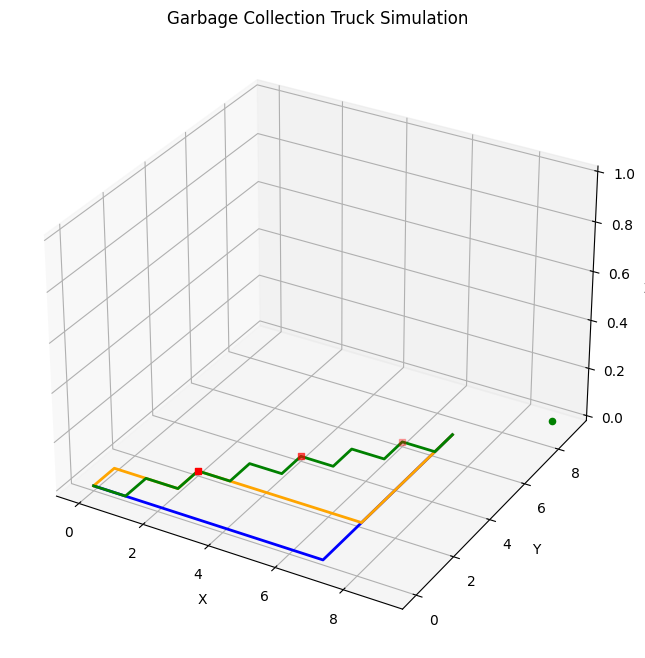

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation

class Environment:
    def __init__(self, size):
        self.size = size
        self.grid = np.zeros((size, size))
        self.target = (size - 1, size - 1)
        self.truck_pos = [(0, 0), (0, 0), (0, 0)]  # Initialize truck positions
        self.obstacles = [(2, 2), (4, 4), (6, 6)]  # Define obstacle positions

        # Add obstacles to the grid
        for obstacle in self.obstacles:
            self.grid[obstacle[0], obstacle[1]] = 1

# Create an instance of the Environment class
env = Environment(size=10)

# Define paths for the trucks' movements
path_1 = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
path_2 = [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
path_3 = [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (5, 4), (5, 5), (6, 5), (6, 6), (7, 6), (7, 7)]

# Create a figure and axes for visualization
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-0.5, env.size - 0.5)
ax.set_ylim3d(-0.5, env.size - 0.5)
ax.set_zlim3d(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Garbage Collection Truck Simulation')

# Scatter plot for obstacles and target
obstacles = np.where(env.grid == 1)
ax.scatter(obstacles[0], obstacles[1], np.zeros_like(obstacles[0]), color='red', marker='s')
ax.scatter([env.target[0]], [env.target[1]], [0], color='green', marker='o')

# Line plots for the paths
path_line_1, = ax.plot([], [], [], color='blue', linestyle='-', linewidth=2)
path_line_2, = ax.plot([], [], [], color='orange', linestyle='-', linewidth=2)
path_line_3, = ax.plot([], [], [], color='green', linestyle='-', linewidth=2)

# Function to update the visualization
def update(frame):
    env.truck_pos[0] = path_1[frame]
    env.truck_pos[1] = path_2[frame]
    env.truck_pos[2] = path_3[frame]
    path_line_1.set_data([pos[0] for pos in path_1[:frame+1]], [pos[1] for pos in path_1[:frame+1]])
    path_line_1.set_3d_properties([0] * (frame + 1))
    path_line_2.set_data([pos[0] for pos in path_2[:frame+1]], [pos[1] for pos in path_2[:frame+1]])
    path_line_2.set_3d_properties([0] * (frame + 1))
    path_line_3.set_data([pos[0] for pos in path_3[:frame+1]], [pos[1] for pos in path_3[:frame+1]])
    path_line_3.set_3d_properties([0] * (frame + 1))
    return path_line_1, path_line_2, path_line_3

# Set the number of frames for animation
num_frames = len(path_1)

# Animate the movement
anim = FuncAnimation(fig, update, frames=num_frames, interval=500, blit=True, repeat=False)

# Save the animation as a video file
anim.save('garbage_truck_animation.mp4')

# Display a message once the animation is saved
print("Animation saved as garbage_truck_animation.mp4")

